In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [2]:
#q1
df = pd.read_csv('NYC_Restaurants.csv', dtype = unicode)
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']
print df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


In [3]:
#q2
df_diff_restaurants = df.drop_duplicates(subset = 'RESTAURANT')
print len(df_diff_restaurants), 'Different Restaurants'

10114 Different Restaurants


In [4]:
#q3
mask = df_diff_restaurants.duplicated(subset = 'DBA')
chains = df_diff_restaurants[mask]
df_diff_chains = chains.drop_duplicates(subset = 'DBA')
print len(df_diff_chains), 'Different Chains'

368 Different Chains


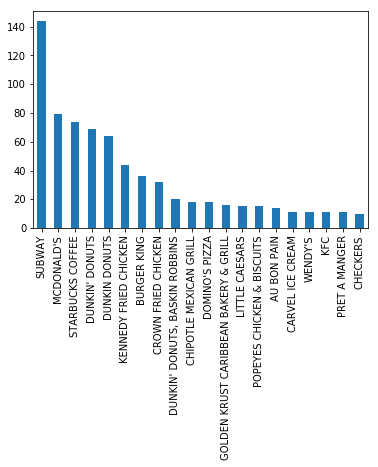

In [6]:
#q4
top_chains = df_diff_restaurants['DBA'].value_counts()
top_chains[:20].plot(kind = 'bar')

In [7]:
#q5
#get total number of chains (duplicate DBA ok, duplicate RESTAURANT not ok)
diff_chains = df_diff_restaurants['DBA'].value_counts() > 1
#divided by total number of restaurants(duplicate RESTAURANT not ok)
float(df_diff_restaurants['DBA'].value_counts()[:diff_chains.sum()].sum())/len(df_diff_restaurants)

0.16472216729286138

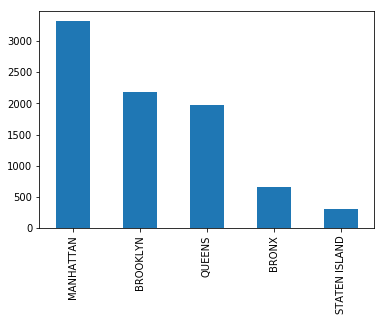

In [147]:
#q6
#plot the number of non-chain restaurants in each boro
mask = df_diff_restaurants['DBA'].duplicated(keep = False)
q6 = df_diff_restaurants[df_diff_restaurants['BORO'] != 'Missing']
q6 = q6['BORO'].loc[mask == False].value_counts()
q6.plot(kind = 'bar')

MANHATTAN        4001
BROOKLYN         2529
QUEENS           2321
BRONX             855
STATEN ISLAND     394
Name: BORO, dtype: int64


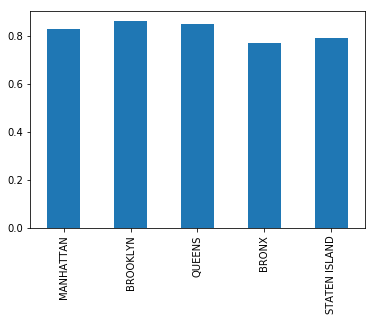

In [148]:
#q7
no_miss = df_diff_restaurants[df_diff_restaurants['BORO'] != 'Missing']
print no_miss['BORO'].value_counts()
frac = q6/no_miss['BORO'].value_counts()
frac.plot(kind = 'bar')

No, the boro with the most independent restaurants is Manhattan while the borough with the highest ratio of independent restaurants is Brooklyn 

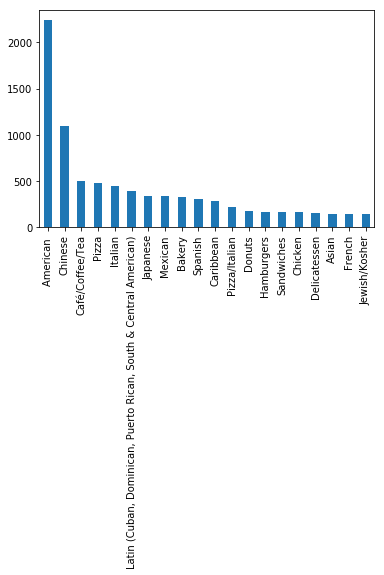

In [9]:
#q8
#get restaurant count for each cuisine
#number of rows for each cuisine
df_diff_restaurants['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

In [149]:
#q9
#need to check for every restaurant. if it NEVER had. so if it was clean 3 times and then the 4th was not clean, it is not clean.
df_clean = df[df['ACTION'] == 'No violations were recorded at the time of this inspection.'
df_dirty = df[df['ACTION'] != 'No violations were recorded at the time of this inspection.']
#use .isin to check if any restaurants with no violation had previous/eventual violation
mask = df_clean.RESTAURANT.isin(df_dirty.RESTAURANT).astype(bool)
#plot common restaurant cuisine types with no violation at all
df_clean[mask == False]['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

SyntaxError: invalid syntax (<ipython-input-149-db9908717250>, line 4)

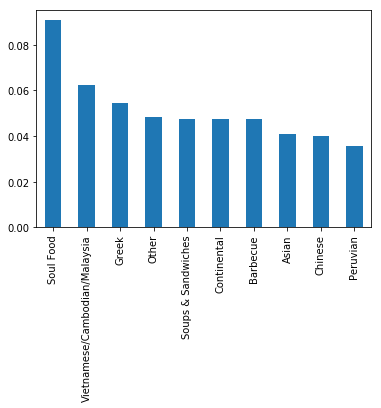

In [144]:
#q10
cuisine = df_diff_restaurants['CUISINE DESCRIPTION'].value_counts()
cuisine20 = cuisine[cuisine.values > 20].keys() 
mask_8 = df_diff_restaurants['CUISINE DESCRIPTION'].value_counts()
mask_9 = df_clean[mask == False]['CUISINE DESCRIPTION'].value_counts()
mys = pd.Series()
for i in range(0,len(cuisine20)):
    mys = mys.append(pd.Series(mask_9[mask_9.keys() == cuisine20[i]]/mask_8[mask_8.keys() == cuisine20[i]]))
mys.sort_values(ascending = False)[:10].plot(kind = 'bar')

In [150]:
#q11
crossTable = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])
#print crossTable
print crossTable.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


In [35]:
#q12
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
print violationFrequency

def mydiv(s):
    
    
#crossTable2 = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO']).div(violationFrequency, axis = 0)
#print crossTable2

Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                                                             6056
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.                                                                                                                                                                                                                                          4821
Evidence of mice or live mice present in facility's food and/or non-food areas.                                                                                                                                                                                       

In [57]:
#q13
type(df['PHONE'].values)

numpy.ndarray